Importing necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, iqr 
import functions as fc

Load dataset with Pandas CSV, and checking: head, tail and shape.

In [3]:
#checking head, tail and shape of the df
leukemia_df = pd.read_csv("Leukemia_GSE63270.csv")
display(leukemia_df.head())
display(leukemia_df.tail())
print("This is the shape of leukemia_df: ", leukemia_df.shape)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,800,normal,5.931912,8.392398,4.920357,7.736547,3.573632,9.829964,6.884182,4.460609,...,12.962624,12.487750,14.135714,13.907042,13.319509,8.338125,10.886329,3.110830,3.961124,3.304741
1,801,normal,6.380280,8.323990,4.530070,7.974131,3.586820,9.618360,6.493603,4.329404,...,12.413454,11.895042,13.788873,13.445914,12.911385,8.170119,10.611425,3.055663,3.883478,3.457585
2,802,normal,5.932934,7.122286,5.262029,8.114709,3.544446,9.944603,6.697071,4.137536,...,13.043093,12.534802,14.059190,13.861394,11.202704,5.831547,7.429013,3.089047,3.578292,3.474241
3,804,normal,5.244537,8.045917,4.925273,7.480720,3.442437,9.000486,6.811556,4.073076,...,12.201631,11.722233,13.493772,13.234765,10.676298,5.392892,7.574076,3.135462,3.733361,3.692536
4,805,normal,5.699076,8.606159,4.860393,7.735289,3.452540,9.489266,7.223656,4.036533,...,12.539572,11.946368,13.947137,13.735116,13.016269,7.526488,10.170549,3.001784,3.612514,3.291216


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
96,899,AML,5.465243,6.745156,4.708246,8.526713,3.421915,10.434257,6.907851,4.025988,...,12.661574,12.298361,14.225776,14.020674,9.520286,4.861935,6.470066,3.019684,3.582879,3.607780
97,900,AML,5.724917,6.345032,4.825745,8.838513,3.375445,10.780957,7.202143,3.913865,...,12.414578,11.964833,14.229790,13.932529,9.572719,4.914898,6.403735,2.916867,3.721884,3.248286
98,901,AML,5.950314,6.266336,4.989613,8.336614,3.503616,9.765917,7.177886,4.020722,...,12.527592,12.140116,14.160433,13.992584,10.334985,5.235110,7.271314,3.030144,3.756870,3.342873
99,902,AML,6.166251,6.162653,5.414927,7.986954,3.334282,10.011242,7.949218,4.212638,...,12.943350,12.561686,14.358292,14.178204,13.218093,6.962081,9.872461,3.113189,3.615684,3.260179
100,903,AML,6.370095,6.198633,5.275000,7.986698,3.333128,10.515759,7.544909,3.968101,...,12.751319,12.212706,14.290009,14.014036,12.735673,6.080006,8.875709,2.923123,3.609150,3.373141


This is the shape of leukemia_df:  (101, 54677)


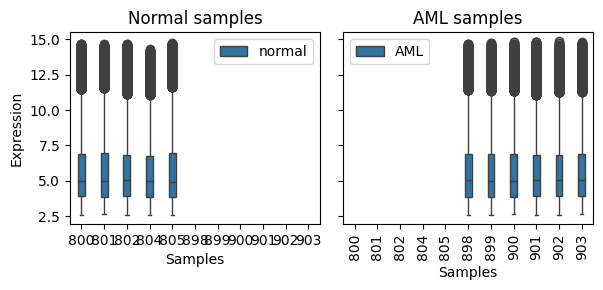

In [48]:
leukemia_melt = pd.melt(leukemia_df, id_vars = ['samples','type'],var_name = 'gene', value_name = 'expression')
leukemia_melt = leukemia_melt.sort_values('samples')

#creating 2df with 6 samples from normal, tumoral(AML)
samples_leukemia_normal_set = leukemia_melt[leukemia_melt['samples'].isin([800, 801, 802, 803, 804, 805])]
samples_leukemia_tumoral_set = leukemia_melt[leukemia_melt['samples'].isin([903, 902, 901, 900, 899, 898])]

# set samples in boxplots
f, ax = plt.subplots(1,2,figsize=(6, 3), sharey=True, sharex=True)
ax[0] = sns.boxplot(x='samples', y='expression', hue = 'type',  data=samples_leukemia_normal_set, width = 0.3, ax=ax[0])
ax[1] = sns.boxplot(x='samples', y='expression', hue='type', data=samples_leukemia_tumoral_set, width=0.3, ax=ax[1])

# Set title, Label and legend
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper left')

ax[0].set_title('Normal samples')
ax[1].set_title('AML samples')

ax[0].set_xlabel('Samples')
ax[1].set_xlabel('Samples')
ax[0].set_ylabel('Expression')

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


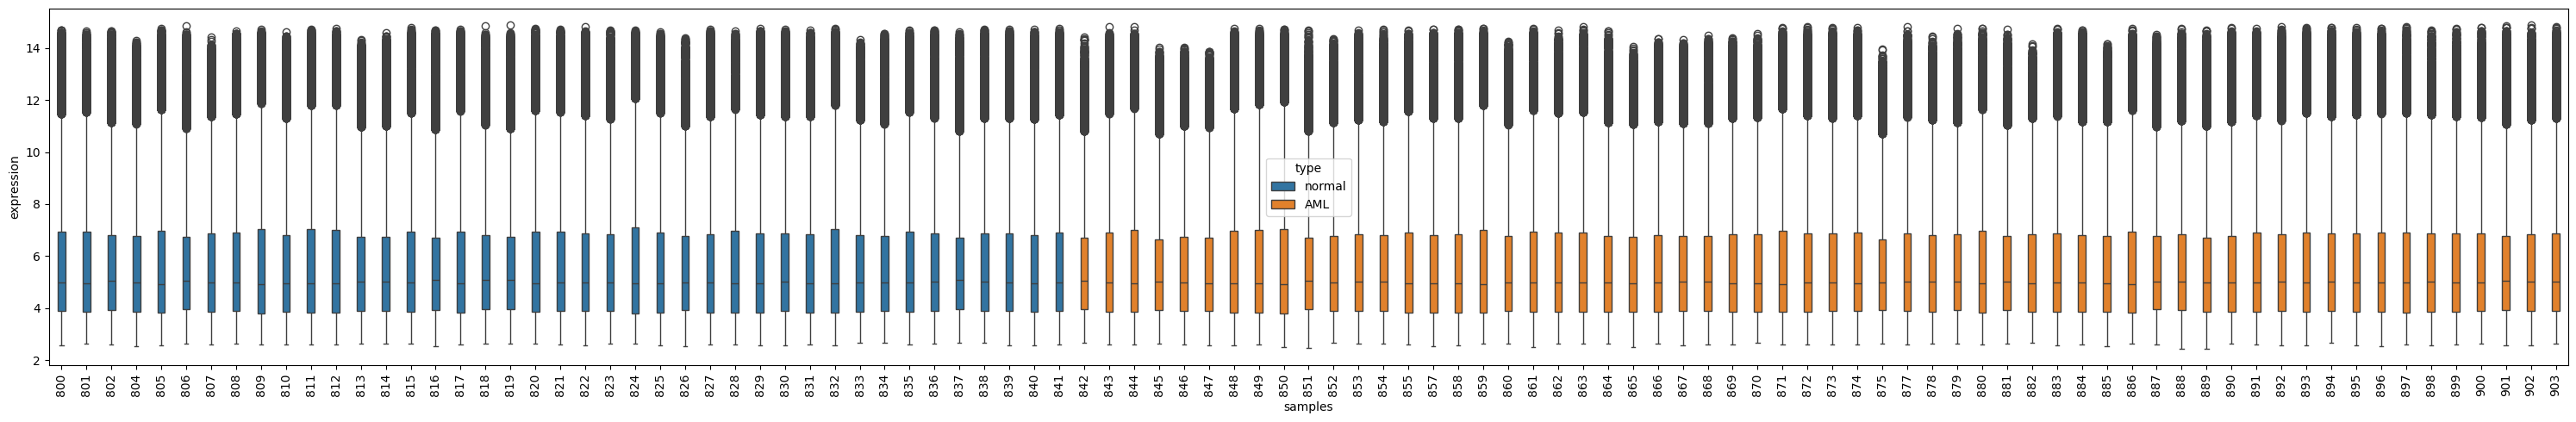

In [5]:
#showing a general view of all samples in the dataset through boxplot, normal and tumoral.
plt.figure(figsize=(30, 5)) 
sns.boxplot(x='samples', y='expression', hue = 'type',  data=leukemia_melt, width = 0.3)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

With a 2-sample t-test we can find a difference on the mean expression levels from the tumoral and normal samples in order to isolate those genes that has a significant impact between the two types samples, to help identify those GE levels that play a role identifying, in this case, Leukemia. 

In [6]:
# Get list of ExpressionGenes with the cleaning function
list_genes = fc.getListDifferentialGenes(leukemia_df, psig=0.05, tumor_value = 'AML', tumor_column = 'type')

# Check the columns in the list 
print(list_genes)

# Check the number of columns in the list
print(len(list_genes))

['1053_at', '117_at', '1255_g_at', '1294_at', '1320_at', '1405_i_at', '1487_at', '1552256_a_at', '1552257_a_at', '1552263_at', '1552264_a_at', '1552266_at', '1552271_at', '1552272_a_at', '1552274_at', '1552275_s_at', '1552277_a_at', '1552278_a_at', '1552279_a_at', '1552286_at', '1552289_a_at', '1552291_at', '1552301_a_at', '1552302_at', '1552303_a_at', '1552307_a_at', '1552309_a_at', '1552310_at', '1552311_a_at', '1552312_a_at', '1552315_at', '1552316_a_at', '1552318_at', '1552320_a_at', '1552322_at', '1552332_at', '1552334_at', '1552335_at', '1552340_at', '1552343_s_at', '1552344_s_at', '1552347_at', '1552354_at', '1552355_s_at', '1552360_a_at', '1552367_a_at', '1552375_at', '1552386_at', '1552388_at', '1552398_a_at', '1552399_a_at', '1552401_a_at', '1552405_at', '1552409_a_at', '1552415_a_at', '1552418_at', '1552419_s_at', '1552422_at', '1552423_at', '1552425_a_at', '1552427_at', '1552430_at', '1552432_at', '1552436_a_at', '1552438_a_at', '1552440_at', '1552457_a_at', '1552458_at', '

In [7]:
# Making a copy, that includes only those GE columns inside the list_genes extracted from the previous function
leukemia_df_list_genes = leukemia_df[list_genes].copy()

# Adding columns type and samples to this new df
leukemia_df_list_genes[['type', 'samples']] = leukemia_df[['type', 'samples']].copy()

#Checking df nº rows-columns
leukemia_df_list_genes.shape

(101, 24057)

In [8]:
# Visualizing the new df
leukemia_df_list_genes.head()

,1053_at,117_at,1255_g_at,1294_at,1320_at,1405_i_at,1487_at,1552256_a_at,1552257_a_at,1552263_at,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioD-3_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,type,samples
0,8.392398,4.920357,3.573632,9.829964,4.460609,4.215257,7.514575,7.911430,9.925031,8.040883,...,6.448343,5.683864,6.434203,12.962624,13.319509,8.338125,10.886329,3.110830,normal,800
1,8.323990,4.530070,3.586820,9.618360,4.329404,5.674460,8.299762,9.457464,9.944637,8.739126,...,6.735958,6.034020,6.543545,12.413454,12.911385,8.170119,10.611425,3.055663,normal,801
2,7.122286,5.262029,3.544446,9.944603,4.137536,4.578893,7.329897,7.830548,8.992313,7.213410,...,6.478293,5.926595,6.242793,13.043093,11.202704,5.831547,7.429013,3.089047,normal,802
3,8.045917,4.925273,3.442437,9.000486,4.073076,4.677561,7.843253,8.532026,10.622306,7.240253,...,6.320126,5.968190,6.080032,12.201631,10.676298,5.392892,7.574076,3.135462,normal,804
4,8.606159,4.860393,3.452540,9.489266,4.036533,3.801779,7.636616,8.185301,10.478703,7.958476,...,6.145305,5.202228,5.482049,12.539572,13.016269,7.526488,10.170549,3.001784,normal,805


Calculating the mean difference from the new df between normal and tumoral samples, based on the tumor column samples

In [9]:
 # Checking mean difference and displaying df for data visualization/exploration
fc.calculate_difference(leukemia_df_list_genes)

,type,1053_at,117_at,1255_g_at,1294_at,1320_at,1405_i_at,1487_at,1552256_a_at,1552257_a_at,...,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioD-3_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at
0,AML,6.820156,5.386436,3.391492,9.981529,4.039573,8.039244,8.417987,8.274863,8.832832,...,12.413503,9.817255,7.060746,6.548575,6.949500,12.596823,11.972877,6.954200,9.272133,3.055995
1,normal,7.703873,4.858759,3.470613,9.571287,4.185101,4.823156,7.741708,8.652130,9.607924,...,13.170842,10.464967,6.443112,5.954401,6.394392,12.798483,12.715443,7.519136,10.040227,3.114010
0,difference,-0.883717,0.527677,-0.079121,0.410242,-0.145528,3.216089,0.676280,-0.377267,-0.775093,...,-0.757339,-0.647712,0.617634,0.594174,0.555108,-0.201660,-0.742566,-0.564936,-0.768095,-0.058015


Checking multicollinearity from the new df and filtering genes that have a high correlation in order to reduce overfitting and avoid redundant information which could affect our training and final model. This way, we will have a clearer base for our model, to enhance performance and ability to predict correctly patters in the GE data.

In [10]:
# Find correlated genes, and create exclude list
correlated_genes, exclude_list, r_value = fc.find_correlated_genes(leukemia_df_list_genes.drop(['type'], axis=1)) 
print(len(exclude_list))
display(r_value.head())

739


,1053_at,117_at,1255_g_at,1294_at,1320_at,1405_i_at,1487_at,1552256_a_at,1552257_a_at,1552263_at,...,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioD-3_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at
1053_at,1.000000,-0.240280,0.289356,-0.250634,0.297483,-0.312804,-0.440060,0.318604,0.713784,0.145327,...,0.334314,0.317161,-0.583741,-0.581230,-0.598005,0.021039,0.320491,0.312304,0.334727,0.239595
117_at,-0.240280,1.000000,-0.189891,-0.305501,-0.093626,0.489775,0.382862,-0.275994,-0.270888,0.264574,...,-0.067096,-0.024383,-0.000450,-0.021747,-0.022853,-0.266616,-0.052080,-0.072151,-0.031413,-0.097957
1255_g_at,0.289356,-0.189891,1.000000,-0.197535,0.227568,-0.264403,-0.276189,0.074195,0.215731,-0.049880,...,0.007061,-0.034508,-0.234268,-0.262179,-0.233747,0.044066,-0.008204,-0.005555,-0.029193,0.196879
1294_at,-0.250634,-0.305501,-0.197535,1.000000,-0.120009,0.042091,0.099352,0.027372,-0.386864,0.117503,...,-0.004234,-0.046029,0.330500,0.332269,0.333909,0.260632,-0.005247,-0.037189,-0.044100,-0.126894
1320_at,0.297483,-0.093626,0.227568,-0.120009,1.000000,-0.182898,-0.225045,0.137821,0.240947,0.018708,...,0.224857,0.153854,-0.233780,-0.253533,-0.254831,0.153528,0.213657,0.163449,0.156989,0.006703


In [11]:
# From our df, dropping columns that are present on the exclude_list, to remove those columns that have multicollinearity
leukemia_df_correlated_genes = leukemia_df_list_genes.drop(exclude_list, axis=1)

In [12]:
display(exclude_list[:4])

['117_at', '1294_at', '1405_i_at', '1552256_a_at']

In [13]:
# Checking a couple of columns to make sure drop was done correctly

#display(leukemia_df_correlated_genes['1053_at']) #not present
#display(leukemia_df_correlated_genes['1294_at']) #not present

In [14]:
# Visualizing new df
display(leukemia_df_correlated_genes)

,1053_at,1255_g_at,1320_at,1487_at,1552263_at,1552264_a_at,1552266_at,1552271_at,1552272_a_at,1552274_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioD-3_at,AFFX-ThrX-3_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,type,samples
0,8.392398,3.573632,4.460609,7.514575,8.040883,6.986509,3.103806,5.778675,5.294137,7.182814,...,11.268907,6.448343,5.683864,6.434203,12.962624,13.319509,10.886329,3.110830,normal,800
1,8.323990,3.586820,4.329404,8.299762,8.739126,7.553143,3.108757,5.849419,5.648202,7.924651,...,11.045629,6.735958,6.034020,6.543545,12.413454,12.911385,10.611425,3.055663,normal,801
2,7.122286,3.544446,4.137536,7.329897,7.213410,7.009361,3.468830,5.487934,5.072913,6.803861,...,7.897663,6.478293,5.926595,6.242793,13.043093,11.202704,7.429013,3.089047,normal,802
3,8.045917,3.442437,4.073076,7.843253,7.240253,6.748787,3.139545,5.632913,4.904794,5.828034,...,8.122378,6.320126,5.968190,6.080032,12.201631,10.676298,7.574076,3.135462,normal,804
4,8.606159,3.452540,4.036533,7.636616,7.958476,7.047560,3.163083,5.902540,5.072794,7.255810,...,10.458383,6.145305,5.202228,5.482049,12.539572,13.016269,10.170549,3.001784,normal,805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6.745156,3.421915,4.025988,8.009510,7.642743,6.744805,3.044049,5.726995,4.574368,8.327916,...,7.314702,9.650312,9.229521,9.513031,12.661574,9.520286,6.470066,3.019684,AML,899
97,6.345032,3.375445,3.913865,7.978396,7.983658,7.140701,3.031587,5.605508,4.696920,7.965424,...,7.266818,9.210182,8.827444,9.066967,12.414578,9.572719,6.403735,2.916867,AML,900
98,6.266336,3.503616,4.020722,8.302088,7.145865,6.017492,3.202732,5.702327,4.935057,9.653203,...,8.063615,9.037903,8.719778,8.834260,12.527592,10.334985,7.271314,3.030144,AML,901
99,6.162653,3.334282,4.212638,8.732066,7.902762,6.410453,2.953499,5.614384,4.849672,9.349366,...,10.400799,9.642514,9.296665,9.334146,12.943350,13.218093,9.872461,3.113189,AML,902


In [15]:
leukemia_df_correlated_genes = leukemia_df_correlated_genes.drop(['samples'], axis=1)

In [16]:
display(leukemia_df_correlated_genes)

,1053_at,1255_g_at,1320_at,1487_at,1552263_at,1552264_a_at,1552266_at,1552271_at,1552272_a_at,1552274_at,...,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioD-3_at,AFFX-ThrX-3_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,type
0,8.392398,3.573632,4.460609,7.514575,8.040883,6.986509,3.103806,5.778675,5.294137,7.182814,...,13.715029,11.268907,6.448343,5.683864,6.434203,12.962624,13.319509,10.886329,3.110830,normal
1,8.323990,3.586820,4.329404,8.299762,8.739126,7.553143,3.108757,5.849419,5.648202,7.924651,...,13.327555,11.045629,6.735958,6.034020,6.543545,12.413454,12.911385,10.611425,3.055663,normal
2,7.122286,3.544446,4.137536,7.329897,7.213410,7.009361,3.468830,5.487934,5.072913,6.803861,...,12.011780,7.897663,6.478293,5.926595,6.242793,13.043093,11.202704,7.429013,3.089047,normal
3,8.045917,3.442437,4.073076,7.843253,7.240253,6.748787,3.139545,5.632913,4.904794,5.828034,...,11.380381,8.122378,6.320126,5.968190,6.080032,12.201631,10.676298,7.574076,3.135462,normal
4,8.606159,3.452540,4.036533,7.636616,7.958476,7.047560,3.163083,5.902540,5.072794,7.255810,...,13.442193,10.458383,6.145305,5.202228,5.482049,12.539572,13.016269,10.170549,3.001784,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6.745156,3.421915,4.025988,8.009510,7.642743,6.744805,3.044049,5.726995,4.574368,8.327916,...,9.896521,7.314702,9.650312,9.229521,9.513031,12.661574,9.520286,6.470066,3.019684,AML
97,6.345032,3.375445,3.913865,7.978396,7.983658,7.140701,3.031587,5.605508,4.696920,7.965424,...,10.208095,7.266818,9.210182,8.827444,9.066967,12.414578,9.572719,6.403735,2.916867,AML
98,6.266336,3.503616,4.020722,8.302088,7.145865,6.017492,3.202732,5.702327,4.935057,9.653203,...,10.958454,8.063615,9.037903,8.719778,8.834260,12.527592,10.334985,7.271314,3.030144,AML
99,6.162653,3.334282,4.212638,8.732066,7.902762,6.410453,2.953499,5.614384,4.849672,9.349366,...,13.557130,10.400799,9.642514,9.296665,9.334146,12.943350,13.218093,9.872461,3.113189,AML


Model without transformation

A logistic regression model was employed to predict whether a sample belongs to the normal or tumoral category based on the filtered gene set. Logistic regression is suitable for binary classification tasks, making it apt for distinguishing between normal and tumoral samples. By leveraging the selected genes and their expression patterns, the logistic regression model provides a probabilistic prediction, aiding in the identification and classification of samples into the respective categories.

In [17]:
leukemia_df_correlated_genes['type'].unique()

array(['normal', 'AML'], dtype=object)

c:\Users\Sabrina\Desktop\TestDA\Week_5\Mid_bootcam_project\notebooks\functions.py:183: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df2[ColumnToPredict].value_counts()[0] != df2[ColumnToPredict].value_counts()[1]:
c:\Users\Sabrina\Desktop\TestDA\Week_5\Mid_bootcam_project\notebooks\functions.py:183: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df2[ColumnToPredict].value_counts()[0] != df2[ColumnToPredict].value_counts()[1]:


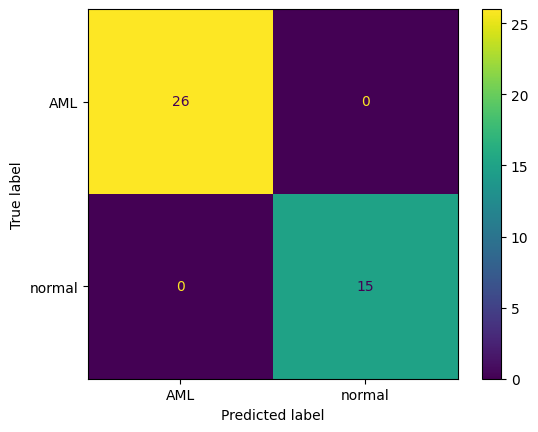

In [18]:
reg_model, cm, scores = fc.trainLogisticModel(leukemia_df_correlated_genes, ColumnToPredict='type', tumor_value='AML')

In [19]:
# Checking model's metrics

print('The scores of the model are:')
for key in scores.keys():
    print(f"{key} : {round(scores[key],2)} ")

The scores of the model are:
accuracy : 1.0 
precision : 1.0 
recall : 1.0 
f1 : 1.0 
kappa : 1.0 


In [20]:
# Saving model
import os 
import pickle

path = "Models/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
# Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

filename = "nath_leukemia_reg.pkl" 
with open(path+filename, "wb") as file:
  pickle.dump(reg_model, file) 

**Uploading a new data set to check the model prediction**

In [29]:
# Uploading new dataframe, checking head, tail and shape of the df
leukemia_df_2 = pd.read_csv("Leukemia_GSE9476.csv")
display(leukemia_df_2.head())
display(leukemia_df_2.tail())
print("This is the shape of leukemia_df_2: ", leukemia_df_2.shape)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
59,60,PBSC_CD34,7.686106,6.856961,6.822222,8.849700,4.440703,8.456949,5.408897,4.708615,...,4.969400,7.016576,12.997293,12.828832,5.084120,4.531087,3.884230,3.619301,4.108490,4.070028
60,61,PBSC_CD34,7.816168,6.875124,6.532324,8.827857,4.515457,8.450286,5.482797,4.667874,...,4.826255,6.577223,12.990305,12.855352,5.260451,4.568651,3.927693,3.634879,4.112277,4.064780
61,62,PBSC_CD34,7.863092,6.896242,6.630690,8.775139,4.458048,8.664517,5.577298,4.853996,...,5.065816,6.583261,12.786121,12.588852,5.451940,4.739944,4.010427,3.668713,4.162220,4.102264
62,63,PBSC_CD34,7.900992,6.787515,6.642927,8.856187,4.499548,9.188459,5.471110,4.637444,...,4.985061,6.815527,13.020089,12.824868,5.459571,4.602105,4.019624,3.570563,4.141371,4.102641
63,64,PBSC_CD34,8.004488,6.657433,6.705597,8.778333,4.599833,8.701859,5.481296,4.640955,...,4.707060,6.454188,12.994600,12.845402,5.371230,4.618882,3.978051,3.638367,4.156842,4.179867


This is the shape of leukemia_df_2:  (64, 22285)


In [30]:
# Checking the new dataframe values for type
leukemia_df_2['type'].unique()

array(['Bone_Marrow_CD34', 'Bone_Marrow', 'AML', 'PB', 'PBSC_CD34'],
      dtype=object)

In [31]:
# As there are multiple types that are not included on the previous df, I will filter the df by type AML
leukemia_df_2 = leukemia_df_2[leukemia_df_2['type'] == 'AML']

In [32]:
#Checking which columns are present in the previous final df and the new df
list_ge = []

for columns in leukemia_df_correlated_genes:
    if columns in leukemia_df_2:
        list_ge.append(columns)

print(list_ge)
print(len(list_ge))

['1053_at', '1255_g_at', '1320_at', '1487_at', '1598_g_at', '160020_at', '1729_at', '177_at', '1861_at', '200000_s_at', '200001_at', '200002_at', '200003_s_at', '200005_at', '200006_at', '200008_s_at', '200011_s_at', '200017_at', '200019_s_at', '200020_at', '200021_at', '200022_at', '200023_s_at', '200024_at', '200025_s_at', '200028_s_at', '200033_at', '200035_at', '200036_s_at', '200037_s_at', '200038_s_at', '200040_at', '200042_at', '200043_at', '200047_s_at', '200050_at', '200051_at', '200052_s_at', '200053_at', '200057_s_at', '200058_s_at', '200059_s_at', '200063_s_at', '200064_at', '200065_s_at', '200068_s_at', '200069_at', '200070_at', '200072_s_at', '200073_s_at', '200074_s_at', '200075_s_at', '200076_s_at', '200078_s_at', '200079_s_at', '200082_s_at', '200083_at', '200084_at', '200085_s_at', '200087_s_at', '200090_at', '200091_s_at', '200092_s_at', '200093_s_at', '200094_s_at', '200096_s_at', '200097_s_at', '200099_s_at', '200596_s_at', '200597_at', '200598_s_at', '200599_s_at'

In [33]:
# Creating a new df based on the columns that are present on the previous list and the final df, to match df2 with final df. 
leukemia_df_3 = leukemia_df_correlated_genes[list_ge]

In [34]:
display(leukemia_df_3)

,1053_at,1255_g_at,1320_at,1487_at,1598_g_at,160020_at,1729_at,177_at,1861_at,200000_s_at,...,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioD-3_at,AFFX-ThrX-3_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,type
0,8.392398,3.573632,4.460609,7.514575,7.275246,6.326674,8.691749,6.528910,6.377675,10.810567,...,13.715029,11.268907,6.448343,5.683864,6.434203,12.962624,13.319509,10.886329,3.110830,normal
1,8.323990,3.586820,4.329404,8.299762,9.081678,6.006152,9.071419,5.963230,6.662524,10.357385,...,13.327555,11.045629,6.735958,6.034020,6.543545,12.413454,12.911385,10.611425,3.055663,normal
2,7.122286,3.544446,4.137536,7.329897,7.155487,6.686688,8.584946,5.285183,5.883488,9.961685,...,12.011780,7.897663,6.478293,5.926595,6.242793,13.043093,11.202704,7.429013,3.089047,normal
3,8.045917,3.442437,4.073076,7.843253,7.234271,6.357336,8.219478,5.609137,6.430216,10.565350,...,11.380381,8.122378,6.320126,5.968190,6.080032,12.201631,10.676298,7.574076,3.135462,normal
4,8.606159,3.452540,4.036533,7.636616,7.072994,6.154072,8.518589,6.133209,6.540612,10.765163,...,13.442193,10.458383,6.145305,5.202228,5.482049,12.539572,13.016269,10.170549,3.001784,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6.745156,3.421915,4.025988,8.009510,7.288725,6.337343,8.597508,5.503023,5.674077,9.744776,...,9.896521,7.314702,9.650312,9.229521,9.513031,12.661574,9.520286,6.470066,3.019684,AML
97,6.345032,3.375445,3.913865,7.978396,7.450665,6.471166,8.968169,5.196403,5.884887,9.811449,...,10.208095,7.266818,9.210182,8.827444,9.066967,12.414578,9.572719,6.403735,2.916867,AML
98,6.266336,3.503616,4.020722,8.302088,7.711701,6.801678,8.699198,5.513699,5.450837,9.361797,...,10.958454,8.063615,9.037903,8.719778,8.834260,12.527592,10.334985,7.271314,3.030144,AML
99,6.162653,3.334282,4.212638,8.732066,7.850636,6.957115,9.290382,5.604578,5.714510,9.713207,...,13.557130,10.400799,9.642514,9.296665,9.334146,12.943350,13.218093,9.872461,3.113189,AML


c:\Users\Sabrina\Desktop\TestDA\Week_5\Mid_bootcam_project\notebooks\functions.py:183: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df2[ColumnToPredict].value_counts()[0] != df2[ColumnToPredict].value_counts()[1]:
c:\Users\Sabrina\Desktop\TestDA\Week_5\Mid_bootcam_project\notebooks\functions.py:183: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df2[ColumnToPredict].value_counts()[0] != df2[ColumnToPredict].value_counts()[1]:


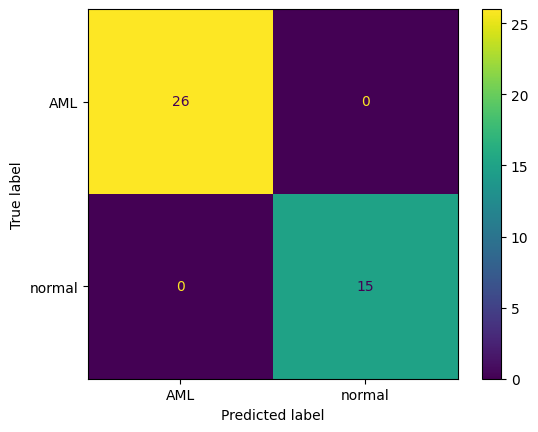

In [35]:
# Creating a new model based on these reduced columns from the previous final df, to be able to predict the latest df_2
reg_model_reduced, cm, scores = fc.trainLogisticModel(leukemia_df_3, ColumnToPredict='type', tumor_value='AML')

In [36]:
# Saving second model
import os 
import pickle

path = "Models/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
# Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

filename = "nath_leukemia_reg_reduced.pkl" 
with open(path+filename, "wb") as file:
  pickle.dump(reg_model_reduced, file) 

In [37]:
# setting dataset 2 the same columns as df3 through the previous list

leukemia_df_2 = leukemia_df_2[list_ge]

In [38]:
leukemia_df_2.shape

(26, 10965)

In [41]:
#I'm creating a new dataframe where I will add the new AML rows to the original df, in order to check the model performance

leukemia_combined = pd.concat([leukemia_df_2, leukemia_df_3], ignore_index=True)

In [42]:
# Visualizing new df
display(leukemia_combined)

,1053_at,1255_g_at,1320_at,1487_at,1598_g_at,160020_at,1729_at,177_at,1861_at,200000_s_at,...,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioD-3_at,AFFX-ThrX-3_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,type
0,6.328213,4.499959,4.660838,7.846105,8.559337,7.911855,7.109585,5.792556,5.443580,8.870919,...,4.299598,4.217585,8.654864,7.920520,8.870370,11.317888,5.212196,3.963202,3.549464,AML
1,6.792462,4.532554,4.632730,7.811900,8.954516,7.672993,7.679190,6.276582,6.340228,8.970885,...,4.406850,4.288279,7.444731,7.150651,7.741081,11.106729,5.222058,3.925986,3.646817,AML
2,7.495171,4.541836,4.723363,7.566225,8.314727,7.697544,7.577779,6.475709,6.441003,9.679534,...,4.576760,4.357382,8.211406,7.565472,8.390527,11.256277,5.282566,3.978497,3.635260,AML
3,6.560074,4.561547,4.755581,7.803249,8.524949,7.847672,7.013907,6.044535,6.099861,8.910367,...,4.696449,4.198853,7.728869,7.019043,8.105528,10.527495,5.421460,4.105291,3.622310,AML
4,6.835476,4.641395,4.715849,7.617487,8.499985,7.913762,7.141218,5.912330,5.983883,9.169434,...,4.709682,4.347554,8.041391,7.601639,8.423282,10.895489,5.226850,4.038676,3.660988,AML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,6.745156,3.421915,4.025988,8.009510,7.288725,6.337343,8.597508,5.503023,5.674077,9.744776,...,9.896521,7.314702,9.650312,9.229521,9.513031,12.661574,9.520286,6.470066,3.019684,AML
123,6.345032,3.375445,3.913865,7.978396,7.450665,6.471166,8.968169,5.196403,5.884887,9.811449,...,10.208095,7.266818,9.210182,8.827444,9.066967,12.414578,9.572719,6.403735,2.916867,AML
124,6.266336,3.503616,4.020722,8.302088,7.711701,6.801678,8.699198,5.513699,5.450837,9.361797,...,10.958454,8.063615,9.037903,8.719778,8.834260,12.527592,10.334985,7.271314,3.030144,AML
125,6.162653,3.334282,4.212638,8.732066,7.850636,6.957115,9.290382,5.604578,5.714510,9.713207,...,13.557130,10.400799,9.642514,9.296665,9.334146,12.943350,13.218093,9.872461,3.113189,AML


In [44]:
# Checking that the concat df has no NaN values
np.sum(leukemia_combined.isna().sum())

0

In [46]:
# Checking there are more AML counts
leukemia_combined['type'].value_counts()

type
AML       86
normal    41
Name: count, dtype: int64

The scores of the model are:
accuracy : 1.0 
precision : 1.0 
recall : 1.0 
f1 : 1.0 
kappa : 1.0 


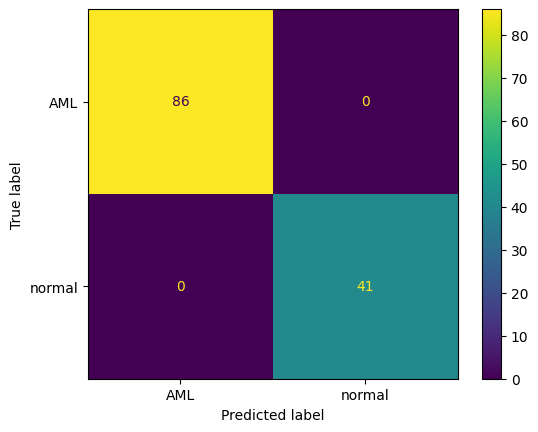

In [47]:
# Create data sets
y = leukemia_combined['type']
X = leukemia_combined.drop(['type'], axis=1)

y_pred3 = reg_model_reduced.predict(X)

model, cm, scores = fc.LogisticModelView(reg_model_reduced, y_pred=y_pred3, y_test=y, pos_label='AML')

print('The scores of the model are:')
for key in scores.keys():
    print(f"{key} : {round(scores[key],2)} ")

Qs
Monday morning (Explore) / afternoon Teusday Start answering
* What is the difference in GE profile between Tumoral and Normal
    * Are there any expression of interest (different between normal and tumoral?)
        - Does the mean/mode of the Tumoral and Normal compare, what are the differences?
        - Possible Bar graph from mean/mode from tumoral and Normal?
    * What is the overall differences between expression within the groups Tumoral/Normal?
        - Check if there are any outliers (possible high values per sample)
        - Check if something is overexpressed (higher than mean of normal) is this overall in tumoral, or only spiked in one sample
        - Possible Normalized line graph (sample to samplem, tumoral expression - control normal expression)
        - come up with maybe another to do visualize this?
    * Are there any genes correlated with eachtother (possible same pathway)
        - Check corraltion matrix on numericals
        - Pick 5 ten of correlated Genes/Probes
        - (Optionally) We can check some papers if really correlated
>> Might possible need some cleaning here?
    Are the genes between data sets the same?
Wednesday / Thursday
* What are the differences between to different types of Tumoral datasets?
    * Are the interesting picks the same between the different sets?
Thursday Morning
Prep the slides
- Dogma
- Why, Data science >3 min
- Grpahs >3 min